## Problem Statement
Welcome Data Scientist to the 2nd SDS Club Monthly Challenge! This month you have been hired by a new car trader company to help sell its used cars. You will be analyzing used cars from multiple manufacturers and of different models. Your job is to help the car trader company determine the price of its used cars.

## Evaluation

MSE 


## Understanding the Dataset

Each column in the dataset is labeled and explained in more detail below. 

    manufacturer_name: the name of the car manufacturer 
    model_name: the name of the car model 
    transmission: the type of transmission the car has 
    color: the body color of the car 
    odometer_value: odometer state in kilometers 
    year_produced: the year the car was produced 
    engine_fuel: the fuel type of the engine of the car 
    engine_has_gas: whether or not the car has a propane tank with tubing 
    engine_type: the engine type of the car 
    engine_capacity: capacity of the engine in liters 
    body_type: the of body the car has 
    has_warranty: whether the car has warranty 
    state: the state of the car (new, owned, etc.) 
    drivetrain: type of drivetrain (front, rear, all) 
    feature_1 - feature_9: these features are boolean values about properties of the car
    duration_listed: the number of days the car is listed in the catalog 
    price_usd: price of the car in USD 

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

In [218]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from  sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import pickle

In [4]:
# Ignore Warnings 

import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

In [5]:
df = pd.read_csv("public_cars.csv")
df.head()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed,price_usd
0,Ford,Fusion,mechanical,blue,245000,2006,gasoline,False,gasoline,1.6,...,False,False,False,False,False,False,False,False,7,4250.0
1,Dodge,Caravan,automatic,silver,265542,2002,gasoline,False,gasoline,3.3,...,False,False,False,False,False,False,False,False,133,4000.0
2,Ford,Galaxy,mechanical,blue,168000,2009,diesel,False,diesel,1.8,...,False,True,False,False,True,True,True,True,0,10900.0
3,Mazda,6,mechanical,other,225522,2008,gasoline,False,gasoline,1.8,...,True,False,False,True,False,False,True,True,20,6999.0
4,Audi,80,mechanical,black,370000,1991,gasoline,False,gasoline,1.8,...,False,False,False,False,False,False,False,True,160,1600.0


In [6]:
# Checking shape and data types
df.shape
df.info()

(30824, 26)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30824 entries, 0 to 30823
Data columns (total 26 columns):
manufacturer_name    30824 non-null object
model_name           30824 non-null object
transmission         30824 non-null object
color                30824 non-null object
odometer_value       30824 non-null int64
year_produced        30824 non-null int64
engine_fuel          30824 non-null object
engine_has_gas       30824 non-null bool
engine_type          30824 non-null object
engine_capacity      30816 non-null float64
body_type            30824 non-null object
has_warranty         30824 non-null bool
state                30824 non-null object
drivetrain           30824 non-null object
feature_0            30824 non-null bool
feature_1            30824 non-null bool
feature_2            30824 non-null bool
feature_3            30824 non-null bool
feature_4            30824 non-null bool
feature_5            30824 non-null bool
feature_6            30824 non-null bool
feature

In [7]:
# Dropping duplicate values

df.shape
df.drop_duplicates(inplace = True)
df.shape

(30824, 26)

(30788, 26)

In [8]:
# 8 null values in engine capacity

df.isnull().sum()

manufacturer_name    0
model_name           0
transmission         0
color                0
odometer_value       0
year_produced        0
engine_fuel          0
engine_has_gas       0
engine_type          0
engine_capacity      8
body_type            0
has_warranty         0
state                0
drivetrain           0
feature_0            0
feature_1            0
feature_2            0
feature_3            0
feature_4            0
feature_5            0
feature_6            0
feature_7            0
feature_8            0
feature_9            0
duration_listed      0
price_usd            0
dtype: int64

In [9]:
df[df['engine_capacity'].isnull()]

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed,price_usd
172,Fiat,500,automatic,orange,49000,2014,electric,False,electric,NaN,...,False,True,False,True,False,True,False,True,11,16000.0
2497,BMW,i3,automatic,other,67000,2018,electric,False,electric,NaN,...,True,True,True,True,True,True,True,True,57,39999.0
2573,Fiat,500,automatic,orange,27000,2013,electric,False,electric,NaN,...,False,True,True,True,False,True,True,True,77,14900.0
3543,Nissan,Leaf,automatic,black,84500,2013,electric,False,electric,NaN,...,False,True,False,True,True,True,True,True,58,15500.0
4246,Nissan,Leaf,automatic,white,50000,2014,electric,False,electric,NaN,...,False,False,False,True,False,True,True,False,18,12900.0
16747,Nissan,Leaf,automatic,black,84000,2014,electric,False,electric,NaN,...,False,False,False,True,True,True,True,True,138,14500.0
22760,Chevrolet,Volt,automatic,silver,168000,2013,electric,False,electric,NaN,...,False,True,False,False,False,True,True,True,6,12950.0
23165,BMW,i3,automatic,white,54150,2015,electric,False,electric,NaN,...,True,True,False,True,True,True,True,True,18,24750.0


In [10]:
# Removing 8 null records out of approx. 30000 non null values

df.shape
df.dropna(inplace = True)
df.shape

(30788, 26)

(30780, 26)

## Data Exploration

In [11]:
# Converting year_produced column to object data type

df['year_produced'] = df['year_produced'].astype('object')

In [12]:
df.describe().round()
df.corr().round(2)

,odometer_value,engine_capacity,duration_listed,price_usd
count,30780.0,30780.0,30780.0,30780.0
mean,249068.0,2.0,80.0,6620.0
std,135581.0,1.0,113.0,6406.0
min,0.0,0.0,0.0,1.0
25%,159000.0,2.0,23.0,2134.0
50%,250000.0,2.0,59.0,4800.0
75%,325000.0,2.0,91.0,8900.0
max,1000000.0,8.0,2232.0,50000.0


,odometer_value,engine_has_gas,engine_capacity,has_warranty,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed,price_usd
odometer_value,1.00,0.05,0.11,-0.19,0.10,-0.15,-0.07,-0.23,-0.07,-0.24,-0.16,-0.25,-0.21,-0.09,-0.00,-0.42
engine_has_gas,0.05,1.00,0.08,-0.02,0.00,-0.01,-0.01,-0.03,0.01,-0.03,-0.03,-0.03,-0.04,-0.01,0.02,-0.06
engine_capacity,0.11,0.08,1.00,-0.05,-0.14,0.14,0.38,0.24,0.45,0.27,0.28,0.20,0.24,0.25,0.08,0.30
has_warranty,-0.19,-0.02,-0.05,1.00,0.15,-0.12,-0.04,-0.03,-0.04,-0.04,-0.02,-0.02,-0.06,-0.09,-0.06,0.29
feature_0,0.10,0.00,-0.14,0.15,1.00,-0.68,-0.29,-0.34,-0.31,-0.40,-0.25,-0.32,-0.46,-0.64,-0.07,-0.23
feature_1,-0.15,-0.01,0.14,-0.12,-0.68,1.00,0.25,0.33,0.27,0.40,0.24,0.32,0.45,0.39,0.10,0.26
feature_2,-0.07,-0.01,0.38,-0.04,-0.29,0.25,1.00,0.43,0.48,0.42,0.42,0.39,0.41,0.37,0.05,0.34
feature_3,-0.23,-0.03,0.24,-0.03,-0.34,0.33,0.43,1.00,0.40,0.50,0.50,0.52,0.51,0.38,0.04,0.47
feature_4,-0.07,0.01,0.45,-0.04,-0.31,0.27,0.48,0.40,1.00,0.49,0.41,0.37,0.41,0.40,0.07,0.34
feature_5,-0.24,-0.03,0.27,-0.04,-0.40,0.40,0.42,0.50,0.49,1.00,0.39,0.45,0.54,0.41,0.05,0.44


In [13]:
df[df['price_usd'] < 100]
df.dtypes

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed,price_usd
1732,ВАЗ,2109,mechanical,blue,225477,1991,gasoline,False,gasoline,1.3,...,False,False,False,False,True,False,True,False,14,60.00
2296,Renault,19,mechanical,blue,99999,1992,gasoline,False,gasoline,1.7,...,False,False,False,False,False,False,False,False,3,10.00
5639,Volkswagen,T4 Caravelle,mechanical,white,1,1995,diesel,False,diesel,2.4,...,False,False,False,False,False,False,False,False,3,1.00
6095,BMW,523,mechanical,blue,450000,1999,gasoline,False,gasoline,2.5,...,False,False,True,True,False,False,False,False,1,9.49
11793,Peugeot,406,mechanical,blue,200000,1997,gasoline,False,gasoline,1.6,...,False,False,False,False,False,False,False,False,1,1.00
22413,ВАЗ,2105,mechanical,red,999999,1991,gasoline,False,gasoline,1.2,...,False,False,False,False,False,False,False,False,1,1.00
23115,Mazda,626,mechanical,black,300000,1987,gasoline,False,gasoline,2.0,...,False,False,False,False,False,False,False,True,0,1.00
24264,Fiat,Palio,mechanical,red,260000,1998,gasoline,False,gasoline,1.6,...,False,False,False,False,False,False,False,False,2,1.00


manufacturer_name     object
model_name            object
transmission          object
color                 object
odometer_value         int64
year_produced         object
engine_fuel           object
engine_has_gas          bool
engine_type           object
engine_capacity      float64
body_type             object
has_warranty            bool
state                 object
drivetrain            object
feature_0               bool
feature_1               bool
feature_2               bool
feature_3               bool
feature_4               bool
feature_5               bool
feature_6               bool
feature_7               bool
feature_8               bool
feature_9               bool
duration_listed        int64
price_usd            float64
dtype: object

In [14]:
# Converting year_produced column to object data type

df['year_produced'] = df['year_produced'].astype('object')

### Boxplots for numerical data to get a sense of spread and deal with any outliers.

'Mean: 249067.80711500975'

'Median: 250000.0'

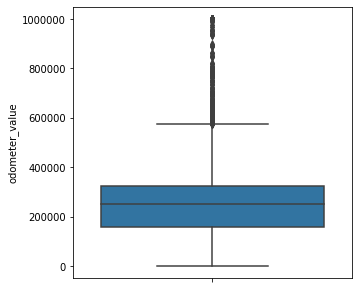

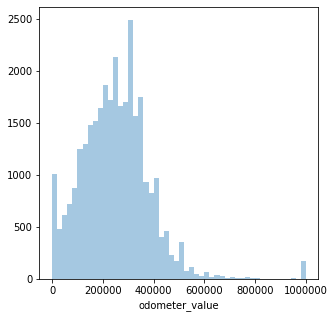

In [15]:
fig, ax = plt.subplots(figsize = (5, 5))
sns.boxplot(ax = ax, y = 'odometer_value', data = df)
fig, ax = plt.subplots(figsize = (5, 5))
sns.distplot(df['odometer_value'], kde = False)
"Mean: " + str(df['odometer_value'].mean())
"Median: " + str(df['odometer_value'].median())

'Mean: 2.0546166341781187'

'Median: 2.0'

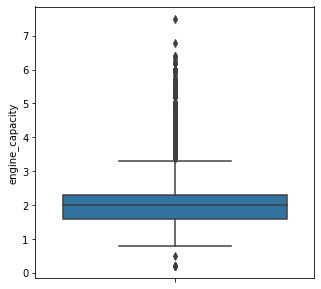

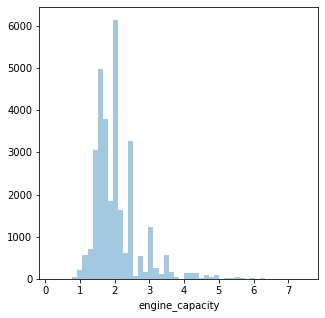

In [16]:
fig, ax = plt.subplots(figsize = (5, 5))
sns.boxplot(ax = ax, y = 'engine_capacity', data = df)
fig, ax = plt.subplots(figsize = (5, 5))
sns.distplot(df['engine_capacity'], kde = False)
"Mean: " + str(df['engine_capacity'].mean())
"Median: " + str(df['engine_capacity'].median())

'Mean: 80.43213125406108'

'Median: 59.0'

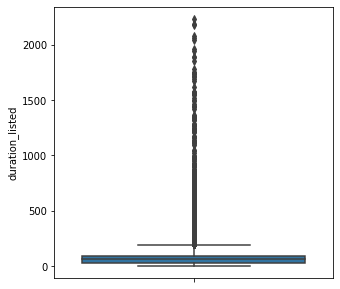

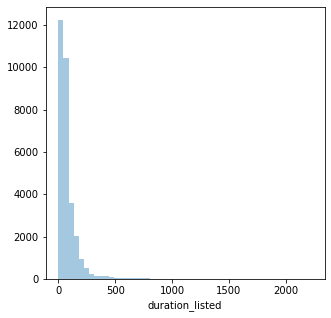

In [17]:
fig, ax = plt.subplots(figsize = (5, 5))
sns.boxplot(ax = ax, y = 'duration_listed', data = df)
fig, ax = plt.subplots(figsize = (5, 5))
sns.distplot(df['duration_listed'], kde = False)
"Mean: " + str(df['duration_listed'].mean())
"Median: " + str(df['duration_listed'].median())

'Mean: 6620.052643924645'

'Median: 4800.0'

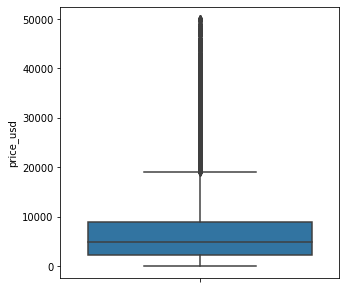

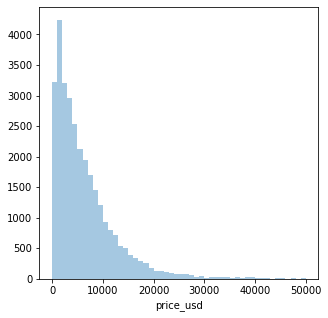

In [18]:
fig, ax = plt.subplots(figsize = (5, 5))
sns.boxplot(ax = ax, y = 'price_usd', data = df)
fig, ax = plt.subplots(figsize = (5, 5))
sns.distplot(df['price_usd'], kde = False)
"Mean: " + str(df['price_usd'].mean())
"Median: " + str(df['price_usd'].median())

## Distribution of Categorical Data

In [19]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30780 entries, 0 to 30823
Data columns (total 26 columns):
manufacturer_name    30780 non-null object
model_name           30780 non-null object
transmission         30780 non-null object
color                30780 non-null object
odometer_value       30780 non-null int64
year_produced        30780 non-null object
engine_fuel          30780 non-null object
engine_has_gas       30780 non-null bool
engine_type          30780 non-null object
engine_capacity      30780 non-null float64
body_type            30780 non-null object
has_warranty         30780 non-null bool
state                30780 non-null object
drivetrain           30780 non-null object
feature_0            30780 non-null bool
feature_1            30780 non-null bool
feature_2            30780 non-null bool
feature_3            30780 non-null bool
feature_4            30780 non-null bool
feature_5            30780 non-null bool
feature_6            30780 non-null bool
featur

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed,price_usd
0,Ford,Fusion,mechanical,blue,245000,2006,gasoline,False,gasoline,1.6,...,False,False,False,False,False,False,False,False,7,4250.0
1,Dodge,Caravan,automatic,silver,265542,2002,gasoline,False,gasoline,3.3,...,False,False,False,False,False,False,False,False,133,4000.0
2,Ford,Galaxy,mechanical,blue,168000,2009,diesel,False,diesel,1.8,...,False,True,False,False,True,True,True,True,0,10900.0
3,Mazda,6,mechanical,other,225522,2008,gasoline,False,gasoline,1.8,...,True,False,False,True,False,False,True,True,20,6999.0
4,Audi,80,mechanical,black,370000,1991,gasoline,False,gasoline,1.8,...,False,False,False,False,False,False,False,True,160,1600.0


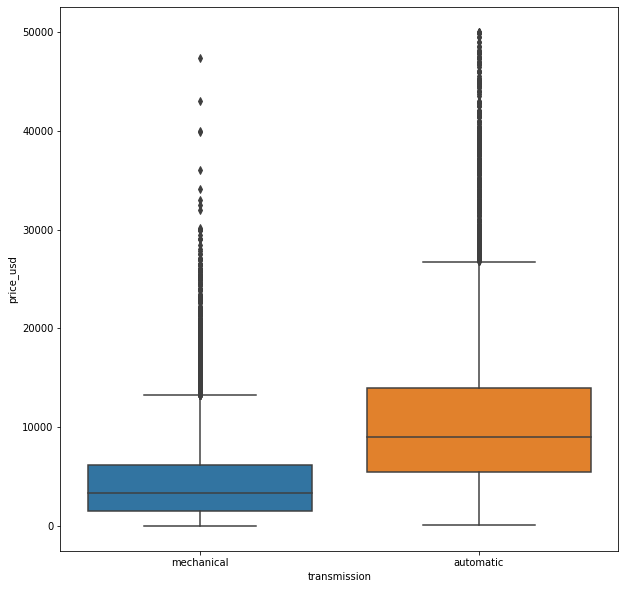

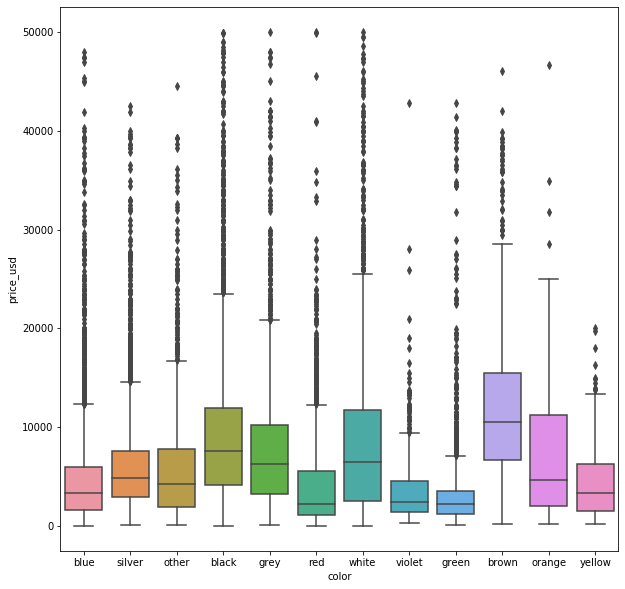

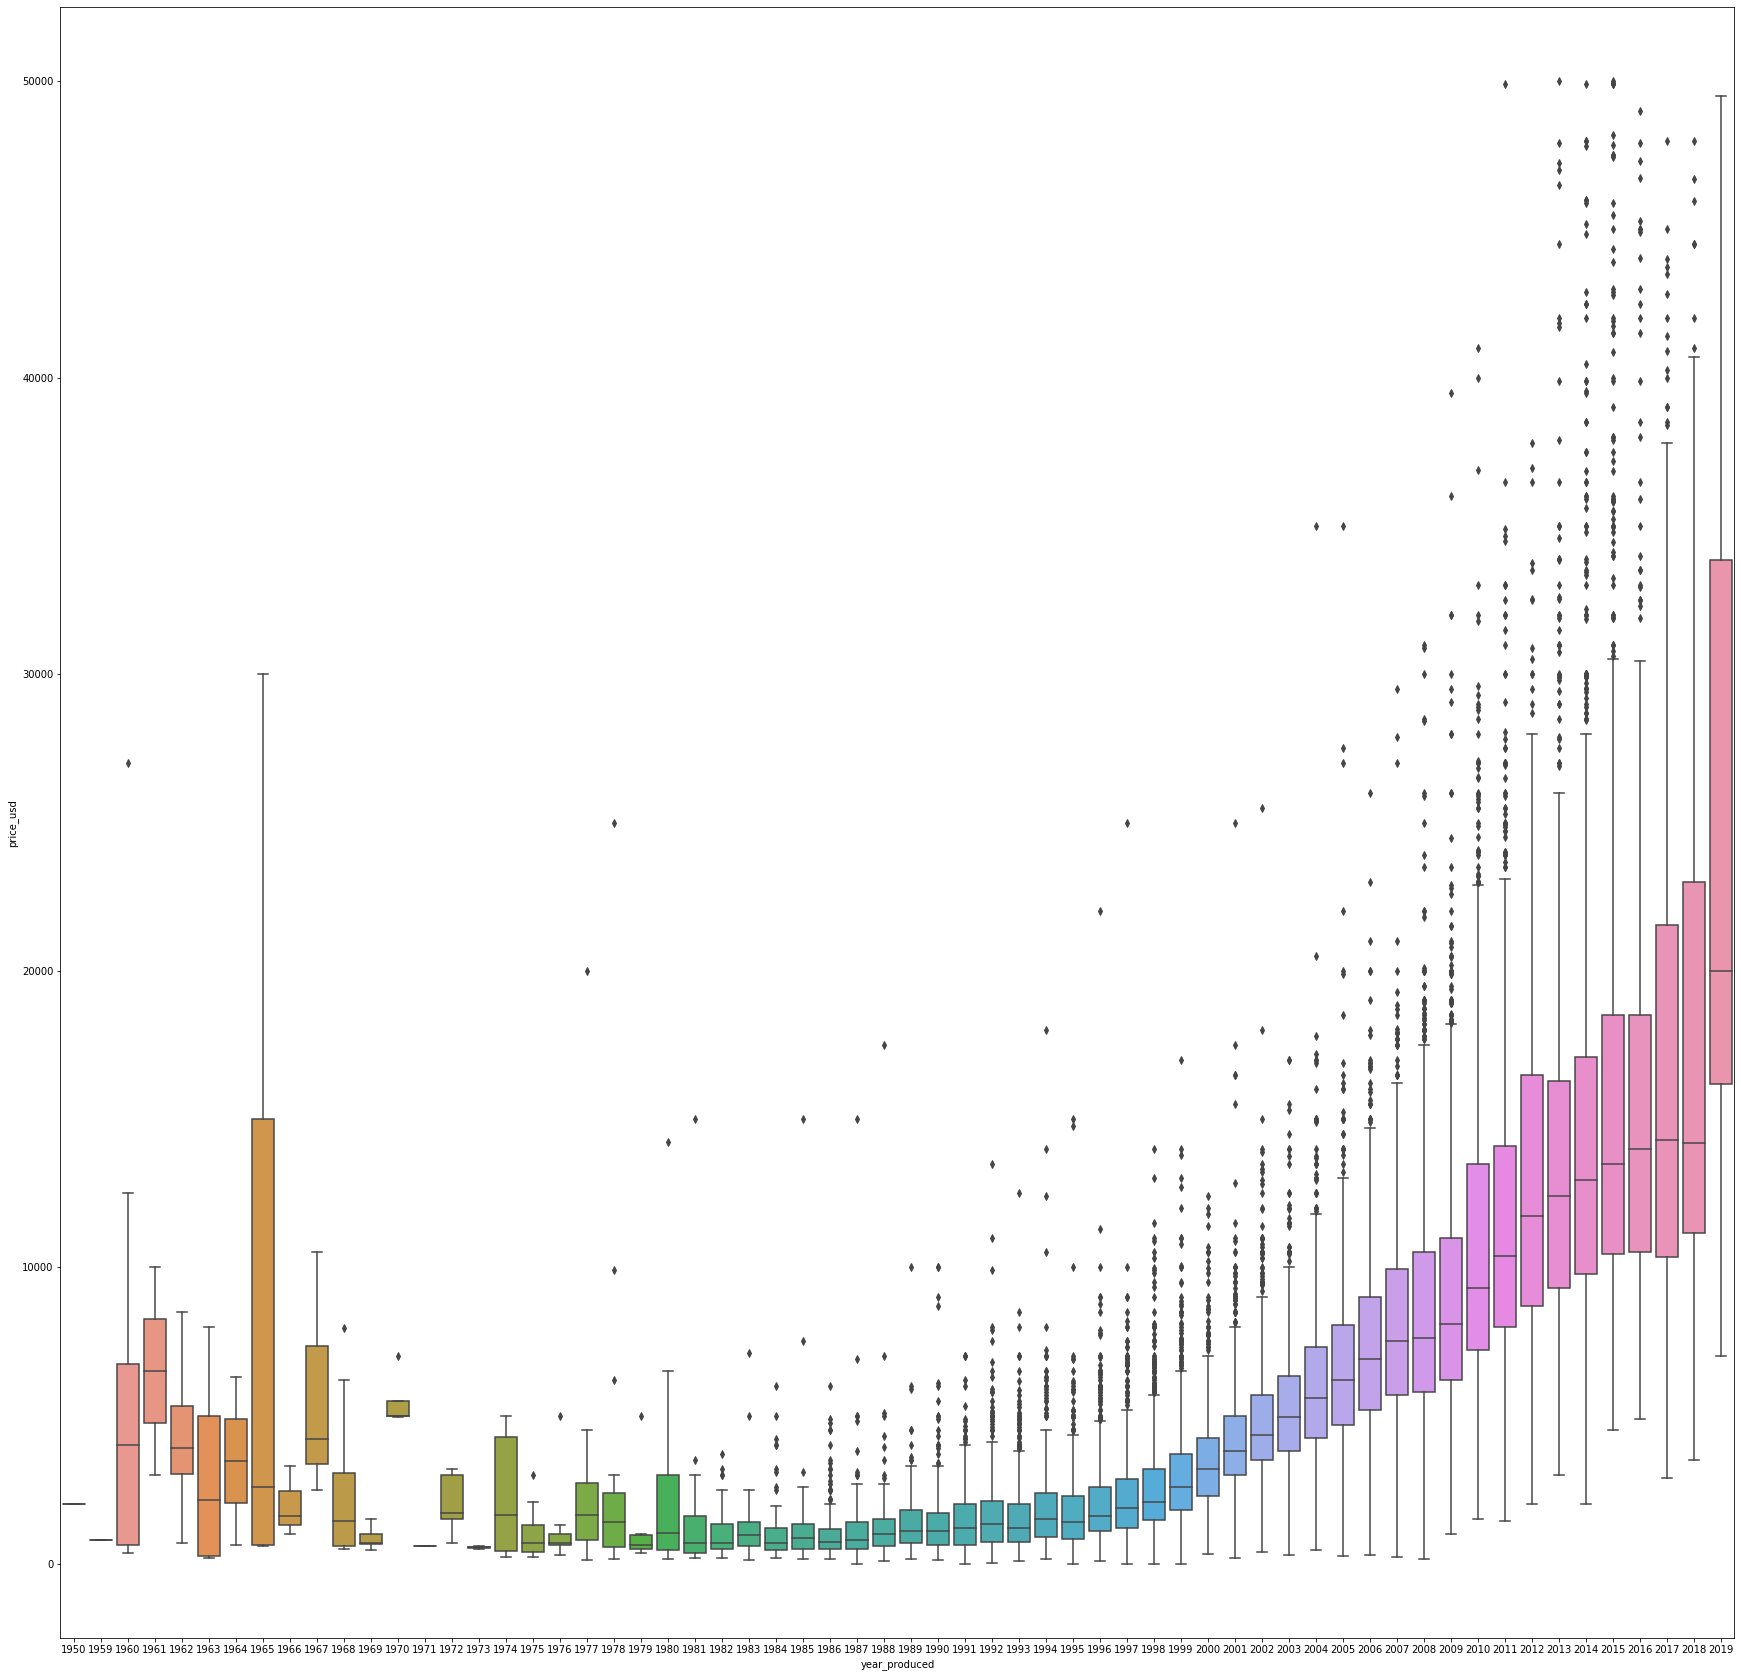

In [20]:
fig, ax = plt.subplots(figsize = (10, 10))
sns.boxplot(ax = ax, x = "transmission", y = "price_usd", data = df)
fig, ax = plt.subplots(figsize = (10, 10))
sns.boxplot(ax = ax, x = "color", y = "price_usd", data = df)
fig, ax = plt.subplots(figsize = (30, 30))
sns.boxplot(ax = ax, x = "year_produced", y = "price_usd", data = df)

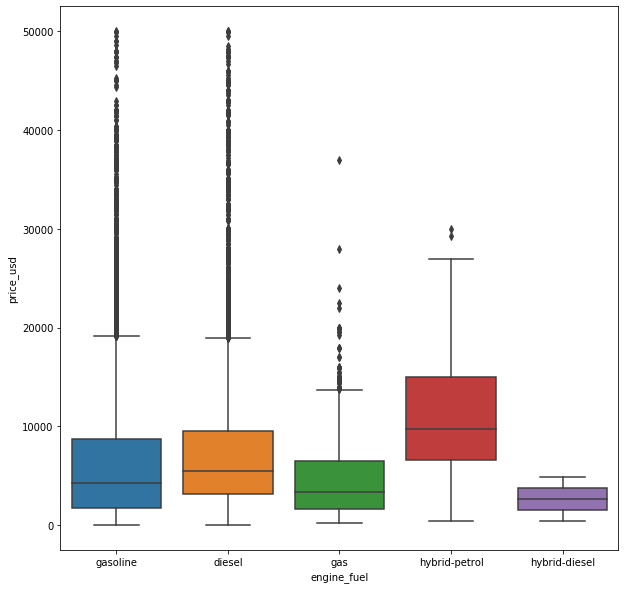

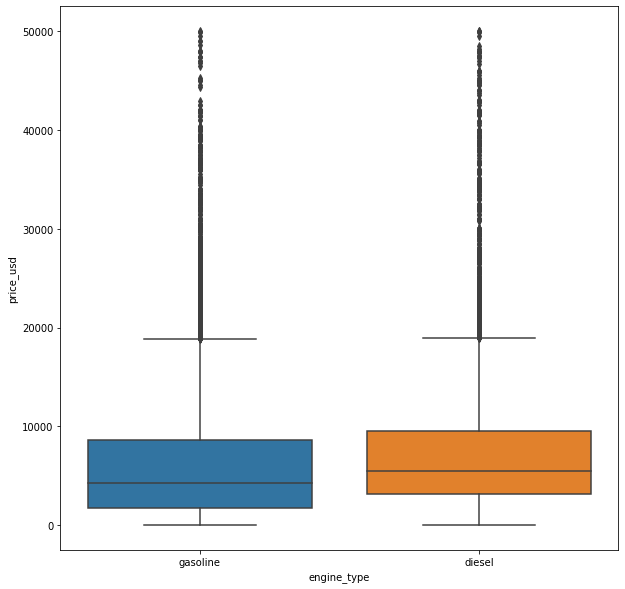

In [21]:
fig, ax = plt.subplots(figsize = (10, 10))
sns.boxplot(ax = ax, x = "engine_fuel", y = "price_usd", data = df)
fig, ax = plt.subplots(figsize = (10, 10))
sns.boxplot(ax = ax, x = "engine_type", y = "price_usd", data = df)

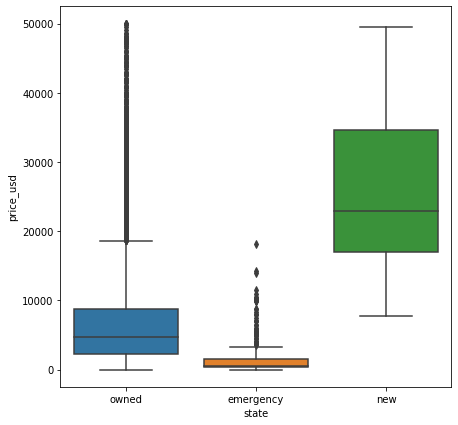

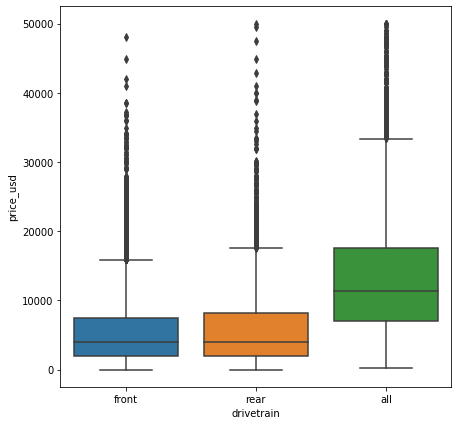

In [22]:
fig, ax = plt.subplots(figsize = (7, 7))
sns.boxplot(ax = ax, x = "state", y = "price_usd", data = df)

fig, ax = plt.subplots(figsize = (7, 7))
sns.boxplot(ax = ax, x = "drivetrain", y = "price_usd", data = df)


## Data Preparation

In [23]:
df.head()
df.info()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed,price_usd
0,Ford,Fusion,mechanical,blue,245000,2006,gasoline,False,gasoline,1.6,...,False,False,False,False,False,False,False,False,7,4250.0
1,Dodge,Caravan,automatic,silver,265542,2002,gasoline,False,gasoline,3.3,...,False,False,False,False,False,False,False,False,133,4000.0
2,Ford,Galaxy,mechanical,blue,168000,2009,diesel,False,diesel,1.8,...,False,True,False,False,True,True,True,True,0,10900.0
3,Mazda,6,mechanical,other,225522,2008,gasoline,False,gasoline,1.8,...,True,False,False,True,False,False,True,True,20,6999.0
4,Audi,80,mechanical,black,370000,1991,gasoline,False,gasoline,1.8,...,False,False,False,False,False,False,False,True,160,1600.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 30780 entries, 0 to 30823
Data columns (total 26 columns):
manufacturer_name    30780 non-null object
model_name           30780 non-null object
transmission         30780 non-null object
color                30780 non-null object
odometer_value       30780 non-null int64
year_produced        30780 non-null object
engine_fuel          30780 non-null object
engine_has_gas       30780 non-null bool
engine_type          30780 non-null object
engine_capacity      30780 non-null float64
body_type            30780 non-null object
has_warranty         30780 non-null bool
state                30780 non-null object
drivetrain           30780 non-null object
feature_0            30780 non-null bool
feature_1            30780 non-null bool
feature_2            30780 non-null bool
feature_3            30780 non-null bool
feature_4            30780 non-null bool
feature_5            30780 non-null bool
feature_6            30780 non-null bool
featur

## Mapping and creating dummy variables

In [24]:
df.head()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed,price_usd
0,Ford,Fusion,mechanical,blue,245000,2006,gasoline,False,gasoline,1.6,...,False,False,False,False,False,False,False,False,7,4250.0
1,Dodge,Caravan,automatic,silver,265542,2002,gasoline,False,gasoline,3.3,...,False,False,False,False,False,False,False,False,133,4000.0
2,Ford,Galaxy,mechanical,blue,168000,2009,diesel,False,diesel,1.8,...,False,True,False,False,True,True,True,True,0,10900.0
3,Mazda,6,mechanical,other,225522,2008,gasoline,False,gasoline,1.8,...,True,False,False,True,False,False,True,True,20,6999.0
4,Audi,80,mechanical,black,370000,1991,gasoline,False,gasoline,1.8,...,False,False,False,False,False,False,False,True,160,1600.0


In [25]:
df.dtypes[df.dtypes == 'object']

manufacturer_name    object
model_name           object
transmission         object
color                object
year_produced        object
engine_fuel          object
engine_type          object
body_type            object
state                object
drivetrain           object
dtype: object

In [26]:
obj = (df.dtypes[df.dtypes == 'object'].reset_index())['index'].tolist()

for i in obj:
    
    print("unique: " + str(i) + str(df[i].unique()))

unique: manufacturer_name['Ford' 'Dodge' 'Mazda' 'Audi' 'Volkswagen' 'Opel' 'Volvo' 'Peugeot'
 'Renault' 'Honda' 'Toyota' 'Mercedes-Benz' 'Citroen' 'Hyundai' 'ВАЗ'
 'Skoda' 'BMW' 'Kia' 'Fiat' 'Chrysler' 'Mitsubishi' 'Rover' 'Chevrolet'
 'Nissan' 'Lifan' 'LADA' 'Jaguar' 'УАЗ' 'Seat' 'Buick' 'Land Rover'
 'Porsche' 'Suzuki' 'Alfa Romeo' 'Daewoo' 'Mini' 'Subaru' 'Lexus' 'Saab'
 'ГАЗ' 'Lancia' 'Pontiac' 'Geely' 'Acura' 'Jeep' 'Chery' 'Infiniti'
 'SsangYong' 'Dacia' 'ЗАЗ' 'Great Wall' 'Lincoln' 'Cadillac' 'Iveco'
 'Москвич']
unique: model_name['Fusion' 'Caravan' 'Galaxy' ... 'Impala' 'FJ Cruiser' 'G400']
unique: transmission['mechanical' 'automatic']
unique: color['blue' 'silver' 'other' 'black' 'grey' 'red' 'white' 'violet' 'green'
 'brown' 'orange' 'yellow']
unique: year_produced[2006 2002 2009 2008 1991 2004 1992 1988 1999 1998 2005 2013 1995 1996
 1997 1994 2014 2007 2003 2017 2011 2000 2010 2012 2019 2001 1986 1985
 1989 1993 2016 1990 2015 1981 1987 2018 1982 1978 1980 1984 1983 1960


In [27]:
one_hot_variables = ['manufacturer_name', 'transmission', 'color', 'engine_fuel', 'engine_type', 'body_type', 'state', 'drivetrain']

label_encoding = ['year_produced', 'engine_has_gas', 'has_warranty', 'feature_0', 'feature_1', 'feature_2', 'feature_3','feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9']


In [28]:
%pprint

Pretty printing has been turned OFF


In [29]:
year = df['year_produced'].unique().tolist()
year = sorted(year)

numbers = []
for i in range(1, 63):
    
    numbers.append(i)

year_map_dict = dict(list(zip(year, numbers)))

df['year_produced_map'] = df['year_produced'].map(year_map_dict)
df.drop('year_produced', inplace = True, axis = 1)
df.head()

,manufacturer_name,model_name,transmission,color,odometer_value,engine_fuel,engine_has_gas,engine_type,engine_capacity,body_type,...,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed,price_usd,year_produced_map
0,Ford,Fusion,mechanical,blue,245000,gasoline,False,gasoline,1.6,hatchback,...,False,False,False,False,False,False,False,7,4250.0,49
1,Dodge,Caravan,automatic,silver,265542,gasoline,False,gasoline,3.3,minivan,...,False,False,False,False,False,False,False,133,4000.0,45
2,Ford,Galaxy,mechanical,blue,168000,diesel,False,diesel,1.8,minivan,...,True,False,False,True,True,True,True,0,10900.0,52
3,Mazda,6,mechanical,other,225522,gasoline,False,gasoline,1.8,universal,...,False,False,True,False,False,True,True,20,6999.0,51
4,Audi,80,mechanical,black,370000,gasoline,False,gasoline,1.8,sedan,...,False,False,False,False,False,False,True,160,1600.0,34


In [30]:
df['engine_has_gas'] = df['engine_has_gas'].map({False: 0, True: 1})
df['has_warranty'] = df['has_warranty'].map({False: 0, True: 1})
df['feature_0'] = df['feature_0'].map({False: 0, True: 1})
df['feature_1'] = df['feature_1'].map({False: 0, True: 1})
df['feature_2'] = df['feature_2'].map({False: 0, True: 1})
df['feature_3'] = df['feature_3'].map({False: 0, True: 1})
df['feature_4'] = df['feature_4'].map({False: 0, True: 1})
df['feature_5'] = df['feature_5'].map({False: 0, True: 1})
df['feature_6'] = df['feature_6'].map({False: 0, True: 1})
df['feature_7'] = df['feature_7'].map({False: 0, True: 1})
df['feature_8'] = df['feature_8'].map({False: 0, True: 1})
df['feature_9'] = df['feature_9'].map({False: 0, True: 1})

In [31]:
df.head()

,manufacturer_name,model_name,transmission,color,odometer_value,engine_fuel,engine_has_gas,engine_type,engine_capacity,body_type,...,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed,price_usd,year_produced_map
0,Ford,Fusion,mechanical,blue,245000,gasoline,0,gasoline,1.6,hatchback,...,0,0,0,0,0,0,0,7,4250.0,49
1,Dodge,Caravan,automatic,silver,265542,gasoline,0,gasoline,3.3,minivan,...,0,0,0,0,0,0,0,133,4000.0,45
2,Ford,Galaxy,mechanical,blue,168000,diesel,0,diesel,1.8,minivan,...,1,0,0,1,1,1,1,0,10900.0,52
3,Mazda,6,mechanical,other,225522,gasoline,0,gasoline,1.8,universal,...,0,0,1,0,0,1,1,20,6999.0,51
4,Audi,80,mechanical,black,370000,gasoline,0,gasoline,1.8,sedan,...,0,0,0,0,0,0,1,160,1600.0,34


In [32]:
df = pd.get_dummies(df, columns = one_hot_variables)
df.head()

,model_name,odometer_value,engine_has_gas,engine_capacity,has_warranty,feature_0,feature_1,feature_2,feature_3,feature_4,...,body_type_sedan,body_type_suv,body_type_universal,body_type_van,state_emergency,state_new,state_owned,drivetrain_all,drivetrain_front,drivetrain_rear
0,Fusion,245000,0,1.6,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,Caravan,265542,0,3.3,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,Galaxy,168000,0,1.8,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
3,6,225522,0,1.8,0,0,1,1,0,0,...,0,0,1,0,0,0,1,0,1,0
4,80,370000,0,1.8,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,1,0


In [33]:
df = df[['odometer_value', 'engine_has_gas', 'engine_capacity', 'has_warranty', 'feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9', 'duration_listed', 'year_produced_map', 'manufacturer_name_Acura', 'manufacturer_name_Alfa Romeo', 'manufacturer_name_Audi', 'manufacturer_name_BMW', 'manufacturer_name_Buick', 'manufacturer_name_Cadillac', 'manufacturer_name_Chery', 'manufacturer_name_Chevrolet', 'manufacturer_name_Chrysler', 'manufacturer_name_Citroen', 'manufacturer_name_Dacia', 'manufacturer_name_Daewoo', 'manufacturer_name_Dodge', 'manufacturer_name_Fiat', 'manufacturer_name_Ford', 'manufacturer_name_Geely', 'manufacturer_name_Great Wall', 'manufacturer_name_Honda', 'manufacturer_name_Hyundai', 'manufacturer_name_Infiniti', 'manufacturer_name_Iveco', 'manufacturer_name_Jaguar', 'manufacturer_name_Jeep', 'manufacturer_name_Kia', 'manufacturer_name_LADA', 'manufacturer_name_Lancia', 'manufacturer_name_Land Rover', 'manufacturer_name_Lexus', 'manufacturer_name_Lifan', 'manufacturer_name_Lincoln', 'manufacturer_name_Mazda', 'manufacturer_name_Mercedes-Benz', 'manufacturer_name_Mini', 'manufacturer_name_Mitsubishi', 'manufacturer_name_Nissan', 'manufacturer_name_Opel', 'manufacturer_name_Peugeot', 'manufacturer_name_Pontiac', 'manufacturer_name_Porsche', 'manufacturer_name_Renault', 'manufacturer_name_Rover', 'manufacturer_name_Saab', 'manufacturer_name_Seat', 'manufacturer_name_Skoda', 'manufacturer_name_SsangYong', 'manufacturer_name_Subaru', 'manufacturer_name_Suzuki', 'manufacturer_name_Toyota', 'manufacturer_name_Volkswagen', 'manufacturer_name_Volvo', 'manufacturer_name_ВАЗ', 'manufacturer_name_ГАЗ', 'manufacturer_name_ЗАЗ', 'manufacturer_name_Москвич', 'manufacturer_name_УАЗ', 'transmission_automatic', 'transmission_mechanical', 'color_black', 'color_blue', 'color_brown', 'color_green', 'color_grey', 'color_orange', 'color_other', 'color_red', 'color_silver', 'color_violet', 'color_white', 'color_yellow', 'engine_fuel_diesel', 'engine_fuel_gas', 'engine_fuel_gasoline', 'engine_fuel_hybrid-diesel', 'engine_fuel_hybrid-petrol', 'engine_type_diesel', 'engine_type_gasoline', 'body_type_cabriolet', 'body_type_coupe', 'body_type_hatchback', 'body_type_liftback', 'body_type_limousine', 'body_type_minibus', 'body_type_minivan', 'body_type_pickup', 'body_type_sedan', 'body_type_suv', 'body_type_universal', 'body_type_van', 'state_emergency', 'state_new', 'state_owned', 'drivetrain_all', 'drivetrain_front', 'drivetrain_rear', 'price_usd']]
df.head()

,odometer_value,engine_has_gas,engine_capacity,has_warranty,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,...,body_type_suv,body_type_universal,body_type_van,state_emergency,state_new,state_owned,drivetrain_all,drivetrain_front,drivetrain_rear,price_usd
0,245000,0,1.6,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,4250.0
1,265542,0,3.3,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,4000.0
2,168000,0,1.8,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,10900.0
3,225522,0,1.8,0,0,1,1,0,0,1,...,0,1,0,0,0,1,0,1,0,6999.0
4,370000,0,1.8,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1600.0


In [34]:
X = df.loc[:, df.columns != 'price_usd']
y = df.loc[:, df.columns == 'price_usd']
X = X.values
y = y.values
X.shape
y.shape

(30780, 110)

(30780, 1)

In [35]:
# Splitting the Dataset

X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

In [36]:
X_train_org.shape
X_test_org.shape
y_train.shape
y_test.shape

(27702, 110)

(3078, 110)

(27702, 1)

(3078, 1)

In [37]:
# Min Max Scaling

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

## Knn Regressor

In [38]:
reg_knn = KNeighborsRegressor()

params_knn = {'n_neighbors': [3, 5, 7, 9, 11]}

grid_knn = GridSearchCV(reg_knn, params_knn, cv = 5)

In [39]:
grid_knn.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [3, 5, 7, 9, 11]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [40]:
print(grid_knn.best_score_)
print(grid_knn.best_params_)

0.7488531493013707
{'n_neighbors': 5}


In [41]:
results_knn = pd.DataFrame(grid_knn.cv_results_)
results_knn

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.417077,0.032435,14.915816,0.232706,3,{'n_neighbors': 3},0.731805,0.738801,0.711208,0.728490,0.750272,0.732115,0.012843,5
1,0.420158,0.037268,15.752818,0.294641,5,{'n_neighbors': 5},0.747167,0.764828,0.736022,0.732519,0.763727,0.748853,0.013496,1
2,0.437481,0.027247,17.031979,0.239183,7,{'n_neighbors': 7},0.746756,0.764158,0.736836,0.730810,0.764305,0.748574,0.013762,2
3,0.436575,0.039664,17.277198,0.334000,9,{'n_neighbors': 9},0.743011,0.763539,0.737719,0.730522,0.763927,0.747744,0.013644,3
4,0.424378,0.049174,16.795962,0.495101,11,{'n_neighbors': 11},0.741266,0.763869,0.736710,0.734001,0.762854,0.747740,0.012968,4


In [42]:
grid_knn.score(X_train, y_train)
grid_knn.score(X_test, y_test)

0.8406589283427451

0.7300402822214492

In [43]:
y_pred = grid_knn.predict(X_test)
y_pred

array([[12459.8  ],
       [ 4687.506],
       [ 6721.128],
       ...,
       [ 2596.   ],
       [ 1538.   ],
       [11700.   ]])

In [44]:
print('MAE:',metrics.mean_absolute_error(y_test, y_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1917.5963638726444
MSE: 10666274.232026948
RMSE: 3265.926244119262


In [45]:
reg_knn_ = KNeighborsRegressor(n_neighbors = 8)
reg_knn_.fit(X_train, y_train)
y_pred_ = reg_knn_.predict(X_test)
print('MAE:',metrics.mean_absolute_error(y_test, y_pred_))
print('MSE:',metrics.mean_squared_error(y_test, y_pred_))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_pred_)))

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                    weights='uniform')

MAE: 1888.8487597465887
MSE: 10517059.22842105
RMSE: 3243.0015769994698


## Decision Tree Regressor

In [46]:
# Base Model
dt_reg = DecisionTreeRegressor(random_state=0)

dt_reg.fit(X_train, y_train)
y_pred_dt = dt_reg.predict(X_test)
y_pred_dt
print('MAE:',metrics.mean_absolute_error(y_test, y_pred_dt))
print('MSE:',metrics.mean_squared_error(y_test, y_pred_dt))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_pred_dt)))

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best')

array([17600.,  4500., 10000., ...,  1000.,  1900.,  8900.])

MAE: 1472.3043136777128
MSE: 6474358.80779227
RMSE: 2544.4761362198446


In [47]:
dt_reg = DecisionTreeRegressor()

params_DT = {'max_depth': [1, 2, 4, 10, 25, 50], 
            'max_features': ['auto', 'sqrt', 'log2'], 
            'min_samples_split': [2, 4, 10, 25, 50], 
            'min_samples_leaf': [2, 4, 10, 25, 50]}

grid_DT = GridSearchCV(dt_reg, params_DT, cv = 5)
grid_DT.fit(X_train, y_train)
print(grid_DT.best_score_)
print(grid_DT.best_params_)

/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tre

/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tre

/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tre

/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tre

/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tre

/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tre

/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tre

/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tre

/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tre

/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tre

/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tre

/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tre

/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tre

/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tre

/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tre

/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tre

/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tre

/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tre

/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tre

/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tre

/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tre

/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tre

/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tre

/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tre

/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tre

/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tre

/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tre

/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tre

/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tre

/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tre

/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tre

/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tre

/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tre

/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tre

/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tre

/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tre

/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tre

/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tre

/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tre

/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tre

/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tre

/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tre

/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tre

/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tre

/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tre

/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tre

/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tre

/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tre

/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tre

/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tre

/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tre

/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tre

/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tre

/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tre

/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tre

/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tre

/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tre

/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tre

/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tre

/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tre

/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tre

/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tre

/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tre

/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tre

/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tre

/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tre

/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tre

/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tre

/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tre

/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tre

/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tre

/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tre

/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:297: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/tre

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=25,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=50,
                                             min_samples_leaf=2,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=0,
                                             splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [1, 2, 4, 10, 25, 50],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [2, 4, 10, 25, 50],
                        

0.870565915821643
{'max_depth': 25, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 50}


In [48]:
grid_DT.score(X_train, y_train)
grid_DT.score(X_test, y_test)

0.9169351457715008

0.8667319388913814

In [49]:
y_pred = grid_DT.predict(X_test)
print('MAE:',metrics.mean_absolute_error(y_test, y_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1320.1268537195288
MSE: 5265502.93448259
RMSE: 2294.6683713518582


## Random Forest

In [50]:
reg_rand_ = RandomForestRegressor(n_estimators = 1000)
reg_rand_.fit(X_train, y_train)
y_pred_ = reg_rand_.predict(X_test)
print('MAE:',metrics.mean_absolute_error(y_test, y_pred_))
print('MSE:',metrics.mean_squared_error(y_test, y_pred_))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_pred_)))

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

MAE: 1107.3155744125665
MSE: 3977663.123759896
RMSE: 1994.4079632211399


Text(0.5, 0, 'Prices')

Text(0, 0.5, 'Predicted prices')

Text(0.5, 1.0, 'Prices vs Predicted prices')

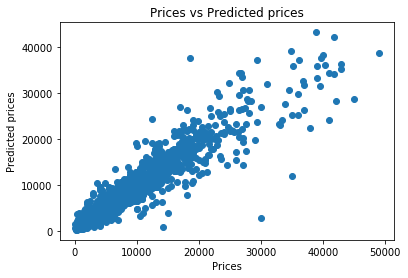

In [51]:
plt.scatter(y_test, y_pred_)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

In [52]:
# get importance
importance = reg_rand_.feature_importances_
len(importance)

110

In [53]:
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.03630
Feature: 1, Score: 0.00016
Feature: 2, Score: 0.08842
Feature: 3, Score: 0.00035
Feature: 4, Score: 0.00113
Feature: 5, Score: 0.00147
Feature: 6, Score: 0.00265
Feature: 7, Score: 0.00206
Feature: 8, Score: 0.00225
Feature: 9, Score: 0.00123
Feature: 10, Score: 0.00241
Feature: 11, Score: 0.00196
Feature: 12, Score: 0.00377
Feature: 13, Score: 0.00287
Feature: 14, Score: 0.01498
Feature: 15, Score: 0.61875
Feature: 16, Score: 0.00007
Feature: 17, Score: 0.00011
Feature: 18, Score: 0.00273
Feature: 19, Score: 0.00233
Feature: 20, Score: 0.00005
Feature: 21, Score: 0.00022
Feature: 22, Score: 0.00042
Feature: 23, Score: 0.00049
Feature: 24, Score: 0.00047
Feature: 25, Score: 0.00022
Feature: 26, Score: 0.00004
Feature: 27, Score: 0.00032
Feature: 28, Score: 0.00009
Feature: 29, Score: 0.00020
Feature: 30, Score: 0.00107
Feature: 31, Score: 0.00091
Feature: 32, Score: 0.00020
Feature: 33, Score: 0.00062
Feature: 34, Score: 0.00084
Feature: 35, Score: 0.00039
Fe

In [54]:
df.head(1)

,odometer_value,engine_has_gas,engine_capacity,has_warranty,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,...,body_type_suv,body_type_universal,body_type_van,state_emergency,state_new,state_owned,drivetrain_all,drivetrain_front,drivetrain_rear,price_usd
0,245000,0,1.6,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,4250.0


In [55]:
(df.columns)[0]
(df.columns)[2]
(df.columns)[14]
(df.columns)[15]
(df.columns)[108]

'odometer_value'

'engine_capacity'

'duration_listed'

'year_produced_map'

'drivetrain_front'

<BarContainer object of 110 artists>

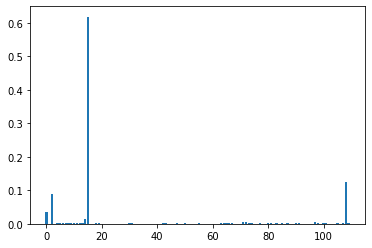

In [56]:
plt.bar([x for x in range(len(importance))], importance)
plt.show()

## ElasticNet Regression

In [59]:
e_reg = ElasticNet()

params_e_reg = {'alpha': [0.001, 0.01, 0.1, 1, 10],
               'l1_ratio': [0, 1, 0.01, 0.5]}

grid_e_reg = GridSearchCV(e_reg, params_e_reg, cv = 5)
grid_e_reg.fit(X_train, y_train)
print(grid_e_reg.best_score_)
print(grid_e_reg.best_params_)

/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 117720884520.7704, tolerance: 90639703.3417446
  positive)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 123383804304.41628, tolerance: 92050528.34905323
  positive)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 119743191504.14023, tolerance: 91450426.45107199
  positive)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increas

/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 228541329813.82745, tolerance: 90639703.3417446
  positive)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 234035567907.16345, tolerance: 92050528.34905323
  positive)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 231330991026.38364, tolerance: 91450426.45107199
  positive)
/Users/rohan10/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increa

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True,
                                  l1_ratio=0.5, max_iter=1000, normalize=False,
                                  positive=False, precompute=False,
                                  random_state=None, selection='cyclic',
                                  tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10],
                         'l1_ratio': [0, 1, 0.01, 0.5]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

0.7545241104490841
{'alpha': 0.1, 'l1_ratio': 1}


In [62]:
grid_e_reg.score(X_train, y_train)
grid_e_reg.score(X_test, y_test)
y_pred = grid_e_reg.predict(X_test)
print('MAE:',metrics.mean_absolute_error(y_test, y_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

0.7565447939425943

0.7327985604125774

MAE: 1995.130505446167
MSE: 10557292.966833426
RMSE: 3249.1988192219674


## Polynomial Regression

In [43]:
train_score_list_poly = []
test_score_list_poly = []

reg_linear = LinearRegression()

for n in range(0,3):
    reg_poly = PolynomialFeatures(n)
    X_train_poly = reg_poly.fit_transform(X_train)
    X_test_poly = reg_poly.transform(X_test)
    reg_linear.fit(X_train_poly, y_train)
    train_score_list_poly.append(reg_linear.score(X_train_poly, y_train))
    test_score_list_poly.append(reg_linear.score(X_test_poly, y_test))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [44]:
train_score_list_poly
test_score_list_poly 

[0.0, 0.7565540652493531, 0.9191917327980035]

[-0.0001516141980806296, 0.7328538147809034, -17101179607592.684]

## Summary of the models on the test set:

    Knn Regressor:
        1. MAE: 1888.8487597465887
        2. MSE: 10517059.22842105
        3. RMSE: 3243.0015769994698
    
    Decision Tree Regressor:
        1. MAE: 1320.1268537195288
        2. MSE: 5265502.93448259
        3. RMSE: 2294.6683713518582
    
    Random Forest Regressor:
        1. MAE: 1107.3155744125665
        2. MSE: 3977663.123759896
        3. RMSE: 1994.4079632211399  Important Features: 'odometer_value', 'engine_capacity', 'duration_listed', 'year_produced', 'drivetrain_front'
    
    ElasticNet Regressor:
        1. MAE: 1995.130505446167
        2. MSE: 10557292.966833426
        3. RMSE: 3249.1988192219674

In [ ]:
# Next Steps

# Describe the data to see the range of values
# Train and predict on the data and see where the differences are huge
# Test on the unseen dataset (look at common values within fields)

In [48]:
one_hot_variables = ['manufacturer_name', 'transmission', 'color', 'engine_fuel', 'engine_type', 'body_type', 'state', 'drivetrain']

## Training the model on the entire dataset and getting predictions for the test set

In [85]:
one_hot_variables = ['manufacturer_name', 'transmission', 'color', 'engine_fuel', 'engine_type', 'body_type', 'state', 'drivetrain']



In [187]:
df_train = pd.read_csv("public_cars.csv")
df_train.head()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed,price_usd
0,Ford,Fusion,mechanical,blue,245000,2006,gasoline,False,gasoline,1.6,...,False,False,False,False,False,False,False,False,7,4250.0
1,Dodge,Caravan,automatic,silver,265542,2002,gasoline,False,gasoline,3.3,...,False,False,False,False,False,False,False,False,133,4000.0
2,Ford,Galaxy,mechanical,blue,168000,2009,diesel,False,diesel,1.8,...,False,True,False,False,True,True,True,True,0,10900.0
3,Mazda,6,mechanical,other,225522,2008,gasoline,False,gasoline,1.8,...,True,False,False,True,False,False,True,True,20,6999.0
4,Audi,80,mechanical,black,370000,1991,gasoline,False,gasoline,1.8,...,False,False,False,False,False,False,False,True,160,1600.0


In [188]:
df_train.dropna(inplace = True)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30816 entries, 0 to 30823
Data columns (total 26 columns):
manufacturer_name    30816 non-null object
model_name           30816 non-null object
transmission         30816 non-null object
color                30816 non-null object
odometer_value       30816 non-null int64
year_produced        30816 non-null int64
engine_fuel          30816 non-null object
engine_has_gas       30816 non-null bool
engine_type          30816 non-null object
engine_capacity      30816 non-null float64
body_type            30816 non-null object
has_warranty         30816 non-null bool
state                30816 non-null object
drivetrain           30816 non-null object
feature_0            30816 non-null bool
feature_1            30816 non-null bool
feature_2            30816 non-null bool
feature_3            30816 non-null bool
feature_4            30816 non-null bool
feature_5            30816 non-null bool
feature_6            30816 non-null bool
feature

In [189]:
df_train.isnull().sum()

manufacturer_name    0
model_name           0
transmission         0
color                0
odometer_value       0
year_produced        0
engine_fuel          0
engine_has_gas       0
engine_type          0
engine_capacity      0
body_type            0
has_warranty         0
state                0
drivetrain           0
feature_0            0
feature_1            0
feature_2            0
feature_3            0
feature_4            0
feature_5            0
feature_6            0
feature_7            0
feature_8            0
feature_9            0
duration_listed      0
price_usd            0
dtype: int64

In [190]:
df_train['engine_has_gas'] = df_train['engine_has_gas'].map({False: 0, True: 1})
df_train['has_warranty'] = df_train['has_warranty'].map({False: 0, True: 1})
df_train['feature_0'] = df_train['feature_0'].map({False: 0, True: 1})
df_train['feature_1'] = df_train['feature_1'].map({False: 0, True: 1})
df_train['feature_2'] = df_train['feature_2'].map({False: 0, True: 1})
df_train['feature_3'] = df_train['feature_3'].map({False: 0, True: 1})
df_train['feature_4'] = df_train['feature_4'].map({False: 0, True: 1})
df_train['feature_5'] = df_train['feature_5'].map({False: 0, True: 1})
df_train['feature_6'] = df_train['feature_6'].map({False: 0, True: 1})
df_train['feature_7'] = df_train['feature_7'].map({False: 0, True: 1})
df_train['feature_8'] = df_train['feature_8'].map({False: 0, True: 1})
df_train['feature_9'] = df_train['feature_9'].map({False: 0, True: 1})

In [191]:
df_train.shape

(30816, 26)

In [192]:
df_train = pd.get_dummies(df_train, columns = one_hot_variables)
df_train.head()
df_train.shape

,model_name,odometer_value,year_produced,engine_has_gas,engine_capacity,has_warranty,feature_0,feature_1,feature_2,feature_3,...,body_type_sedan,body_type_suv,body_type_universal,body_type_van,state_emergency,state_new,state_owned,drivetrain_all,drivetrain_front,drivetrain_rear
0,Fusion,245000,2006,0,1.6,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,Caravan,265542,2002,0,3.3,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
2,Galaxy,168000,2009,0,1.8,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
3,6,225522,2008,0,1.8,0,0,1,1,0,...,0,0,1,0,0,0,1,0,1,0
4,80,370000,1991,0,1.8,0,0,0,0,0,...,1,0,0,0,0,0,1,0,1,0


(30816, 112)

In [193]:
df_train = df_train[['odometer_value', 'year_produced', 'engine_has_gas', 'engine_capacity', 'has_warranty', 'feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9', 'duration_listed', 'manufacturer_name_Acura', 'manufacturer_name_Alfa Romeo', 'manufacturer_name_Audi', 'manufacturer_name_BMW', 'manufacturer_name_Buick', 'manufacturer_name_Cadillac', 'manufacturer_name_Chery', 'manufacturer_name_Chevrolet', 'manufacturer_name_Chrysler', 'manufacturer_name_Citroen', 'manufacturer_name_Dacia', 'manufacturer_name_Daewoo', 'manufacturer_name_Dodge', 'manufacturer_name_Fiat', 'manufacturer_name_Ford', 'manufacturer_name_Geely', 'manufacturer_name_Great Wall', 'manufacturer_name_Honda', 'manufacturer_name_Hyundai', 'manufacturer_name_Infiniti', 'manufacturer_name_Iveco', 'manufacturer_name_Jaguar', 'manufacturer_name_Jeep', 'manufacturer_name_Kia', 'manufacturer_name_LADA', 'manufacturer_name_Lancia', 'manufacturer_name_Land Rover', 'manufacturer_name_Lexus', 'manufacturer_name_Lifan', 'manufacturer_name_Lincoln', 'manufacturer_name_Mazda', 'manufacturer_name_Mercedes-Benz', 'manufacturer_name_Mini', 'manufacturer_name_Mitsubishi', 'manufacturer_name_Nissan', 'manufacturer_name_Opel', 'manufacturer_name_Peugeot', 'manufacturer_name_Pontiac', 'manufacturer_name_Porsche', 'manufacturer_name_Renault', 'manufacturer_name_Rover', 'manufacturer_name_Saab', 'manufacturer_name_Seat', 'manufacturer_name_Skoda', 'manufacturer_name_SsangYong', 'manufacturer_name_Subaru', 'manufacturer_name_Suzuki', 'manufacturer_name_Toyota', 'manufacturer_name_Volkswagen', 'manufacturer_name_Volvo', 'manufacturer_name_ВАЗ', 'manufacturer_name_ГАЗ', 'manufacturer_name_ЗАЗ', 'manufacturer_name_Москвич', 'manufacturer_name_УАЗ', 'transmission_automatic', 'transmission_mechanical', 'color_black', 'color_blue', 'color_brown', 'color_green', 'color_grey', 'color_orange', 'color_other', 'color_red', 'color_silver', 'color_violet', 'color_white', 'color_yellow', 'engine_fuel_diesel', 'engine_fuel_gas', 'engine_fuel_gasoline', 'engine_fuel_hybrid-diesel', 'engine_fuel_hybrid-petrol', 'engine_type_diesel', 'engine_type_gasoline', 'body_type_cabriolet', 'body_type_coupe', 'body_type_hatchback', 'body_type_liftback', 'body_type_limousine', 'body_type_minibus', 'body_type_minivan', 'body_type_pickup', 'body_type_sedan', 'body_type_suv', 'body_type_universal', 'body_type_van', 'state_emergency', 'state_new', 'state_owned', 'drivetrain_all', 'drivetrain_front', 'drivetrain_rear', 'price_usd']]
df_train.head()


,odometer_value,year_produced,engine_has_gas,engine_capacity,has_warranty,feature_0,feature_1,feature_2,feature_3,feature_4,...,body_type_suv,body_type_universal,body_type_van,state_emergency,state_new,state_owned,drivetrain_all,drivetrain_front,drivetrain_rear,price_usd
0,245000,2006,0,1.6,0,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,4250.0
1,265542,2002,0,3.3,0,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,4000.0
2,168000,2009,0,1.8,0,0,0,0,1,0,...,0,0,0,0,0,1,0,1,0,10900.0
3,225522,2008,0,1.8,0,0,1,1,0,0,...,0,1,0,0,0,1,0,1,0,6999.0
4,370000,1991,0,1.8,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1600.0


In [194]:
X = df_train.loc[:, df_train.columns != 'price_usd']
y = df_train.loc[:, df_train.columns == 'price_usd']
X = X.values
y = y.values
X.shape
y.shape

(30816, 110)

(30816, 1)

In [195]:
# Min Max Scaling

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X)

In [96]:
reg_rand_f = RandomForestRegressor(n_estimators = 1000)
reg_rand_scores = cross_val_score(reg_rand_f, X_train, y, scoring = "neg_mean_squared_error", cv = 5)
reg_rand_scores

array([-3617207.13037665, -3682060.301352  , -3700142.07678786,
       -4173123.45226935, -3626016.8050976 ])

In [98]:
reg_rand_final = RandomForestRegressor(n_estimators = 1000)
reg_rand_final.fit(X_train, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

## Predicting on the Test Data

In [196]:
df_test = pd.read_csv('pred_cars.csv')
df_test.shape

(7707, 25)

In [197]:
df_test.head()
df_test.tail()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Renault,Megane,mechanical,blue,360000,1997,gasoline,False,gasoline,1.6,...,True,False,False,False,False,False,True,False,True,114
1,Peugeot,206,mechanical,silver,267000,1999,gasoline,False,gasoline,1.4,...,False,False,False,False,False,False,False,False,True,67
2,Volkswagen,Sharan,mechanical,blue,172000,2000,gasoline,False,gasoline,2.0,...,False,False,False,False,False,False,False,False,False,50
3,Volvo,XC60,mechanical,white,230000,2009,diesel,False,diesel,2.4,...,True,True,True,False,True,True,True,True,True,79
4,Mazda,3,mechanical,silver,206000,2007,gasoline,False,gasoline,1.6,...,True,False,True,False,True,False,False,False,False,74


,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
7702,Chrysler,Sebring,automatic,blue,347618,2001,gasoline,False,gasoline,2.4,...,False,False,False,False,False,False,False,False,False,81
7703,Geely,Emgrand 7,automatic,black,9700,2018,gasoline,False,gasoline,2.0,...,True,False,True,False,True,False,True,True,True,84
7704,Chrysler,Sebring,automatic,red,111111,2001,gasoline,False,gasoline,2.4,...,False,False,False,False,False,False,False,False,False,1
7705,Ford,EcoSport,mechanical,white,109000,2016,diesel,False,diesel,1.5,...,False,False,True,False,False,True,True,True,True,2
7706,Skoda,Fabia,mechanical,blue,180000,2000,gasoline,False,gasoline,1.4,...,False,False,False,False,False,False,False,False,False,26


In [198]:
# Processing the test dataset

df_test.dropna(inplace = True)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7705 entries, 0 to 7706
Data columns (total 25 columns):
manufacturer_name    7705 non-null object
model_name           7705 non-null object
transmission         7705 non-null object
color                7705 non-null object
odometer_value       7705 non-null int64
year_produced        7705 non-null int64
engine_fuel          7705 non-null object
engine_has_gas       7705 non-null bool
engine_type          7705 non-null object
engine_capacity      7705 non-null float64
body_type            7705 non-null object
has_warranty         7705 non-null bool
state                7705 non-null object
drivetrain           7705 non-null object
feature_0            7705 non-null bool
feature_1            7705 non-null bool
feature_2            7705 non-null bool
feature_3            7705 non-null bool
feature_4            7705 non-null bool
feature_5            7705 non-null bool
feature_6            7705 non-null bool
feature_7            7705 non-

In [199]:
one_hot_variables

['manufacturer_name', 'transmission', 'color', 'engine_fuel', 'engine_type', 'body_type', 'state', 'drivetrain']

In [200]:
df_test['engine_has_gas'] = df_test['engine_has_gas'].map({False: 0, True: 1})
df_test['has_warranty'] = df_test['has_warranty'].map({False: 0, True: 1})
df_test['feature_0'] = df_test['feature_0'].map({False: 0, True: 1})
df_test['feature_1'] = df_test['feature_1'].map({False: 0, True: 1})
df_test['feature_2'] = df_test['feature_2'].map({False: 0, True: 1})
df_test['feature_3'] = df_test['feature_3'].map({False: 0, True: 1})
df_test['feature_4'] = df_test['feature_4'].map({False: 0, True: 1})
df_test['feature_5'] = df_test['feature_5'].map({False: 0, True: 1})
df_test['feature_6'] = df_test['feature_6'].map({False: 0, True: 1})
df_test['feature_7'] = df_test['feature_7'].map({False: 0, True: 1})
df_test['feature_8'] = df_test['feature_8'].map({False: 0, True: 1})
df_test['feature_9'] = df_test['feature_9'].map({False: 0, True: 1})

In [201]:
df_test.shape
df_train.shape

(7705, 25)

(30816, 111)

In [202]:
df_test = pd.get_dummies(df_test, columns = one_hot_variables)

df_train, df_test = df_train.align(df_test, join = 'left', axis = 1)

In [203]:
df_test.head()

,odometer_value,year_produced,engine_has_gas,engine_capacity,has_warranty,feature_0,feature_1,feature_2,feature_3,feature_4,...,body_type_suv,body_type_universal,body_type_van,state_emergency,state_new,state_owned,drivetrain_all,drivetrain_front,drivetrain_rear,price_usd
0,360000,1997,0,1.6,0,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,NaN
1,267000,1999,0,1.4,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,NaN
2,172000,2000,0,2.0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,NaN
3,230000,2009,0,2.4,0,0,1,1,1,0,...,0,1,0,0,0,1,0,1,0,NaN
4,206000,2007,0,1.6,0,0,1,0,1,0,...,0,0,0,0,0,1,0,1,0,NaN


In [205]:
df_test["engine_fuel_hybrid-diesel"] = df_test["engine_fuel_hybrid-diesel"].replace(np.nan, 0)

In [206]:
X_test = df_test.loc[:, df_test.columns != 'price_usd']
X_test = X_test.values
X_test.shape

(7705, 110)

In [207]:
X_test = scaler.transform(X_test)

In [208]:
y_predictions = reg_rand_final.predict(X_test)

In [214]:
predictions = pd.Series(y_predictions.tolist())
predictions

0        1470.17286
1        1958.13177
2        4474.16596
3       11544.03135
4        4905.41151
5        3097.35564
6       11271.36614
7         440.80539
8        4773.93935
9        2717.99416
10        830.98424
11       1625.91088
12       8366.70037
13       1436.40732
14        909.69840
15       3580.90962
16       6999.79675
17       1488.11455
18       7465.06537
19      13818.21612
20       7203.49807
21       8435.57945
22       4540.69328
23      13832.38826
24       9799.04458
25       3459.83477
26       4184.92800
27       4561.75903
28       3582.24769
29       6660.41306
           ...     
7675    18883.38868
7676     7316.60425
7677     1848.33536
7678     2187.51432
7679     7873.48917
7680     9689.23561
7681    23141.22212
7682     5067.10119
7683     7878.29865
7684     3967.05549
7685     4975.22432
7686    11289.47380
7687    18500.06752
7688     1730.35862
7689     1885.48749
7690     2878.45219
7691     3340.98494
7692     9159.27626
7693     5533.54723


In [220]:
# Saving the model

pickle.dump(reg_rand_final, open("cars_prediction_model", 'wb'))

In [221]:
loaded_model = pickle.load(open("cars_prediction_model", "rb"))
loaded_model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

## Appendix

## Using Dataset with High Feature Importance Values

In [117]:
df_f = df[['odometer_value', 'engine_has_gas', 'engine_capacity', 'has_warranty', 'duration_listed', 'year_produced_map', 'drivetrain_front', 'price_usd']]
df_f.head()

,odometer_value,engine_has_gas,engine_capacity,has_warranty,duration_listed,year_produced_map,drivetrain_front,price_usd
0,245000,0,1.6,0,7,49,1,4250.0
1,265542,0,3.3,0,133,45,1,4000.0
2,168000,0,1.8,0,0,52,1,10900.0
3,225522,0,1.8,0,20,51,1,6999.0
4,370000,0,1.8,0,160,34,1,1600.0


In [119]:
df_f.corr()

,odometer_value,engine_has_gas,engine_capacity,has_warranty,duration_listed,year_produced_map,drivetrain_front,price_usd
odometer_value,1.000000,0.053224,0.105687,-0.186149,-0.001297,-0.487486,-0.010365,-0.418119
engine_has_gas,0.053224,1.000000,0.080011,-0.020057,0.023312,-0.070758,-0.011887,-0.062359
engine_capacity,0.105687,0.080011,1.000000,-0.053626,0.078019,0.008938,-0.537631,0.297574
has_warranty,-0.186149,-0.020057,-0.053626,1.000000,-0.058949,0.205306,-0.006025,0.288677
duration_listed,-0.001297,0.023312,0.078019,-0.058949,1.000000,-0.014800,-0.065732,0.034946
year_produced_map,-0.487486,-0.070758,0.008938,0.205306,-0.014800,1.000000,0.001842,0.706970
drivetrain_front,-0.010365,-0.011887,-0.537631,-0.006025,-0.065732,0.001842,1.000000,-0.315366
price_usd,-0.418119,-0.062359,0.297574,0.288677,0.034946,0.706970,-0.315366,1.000000


In [120]:
X = df_f.loc[:, df_f.columns != 'price_usd']
y = df_f.loc[:, df_f.columns == 'price_usd']
X = X.values
y = y.values
X.shape
y.shape
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

(30780, 7)

(30780, 1)

In [121]:
reg_rand_f = RandomForestRegressor(n_estimators = 1000)
reg_rand_f.fit(X_train, y_train)
y_pred_f = reg_rand_f.predict(X_test)
print('MAE:',metrics.mean_absolute_error(y_test, y_pred_f))
print('MSE:',metrics.mean_squared_error(y_test, y_pred_f))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_pred_f)))

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

MAE: 1542.1746467995852
MSE: 6526049.6355647
RMSE: 2554.6134023692703


Text(0.5, 0, 'Prices')

Text(0, 0.5, 'Predicted prices')

Text(0.5, 1.0, 'Prices vs Predicted prices')

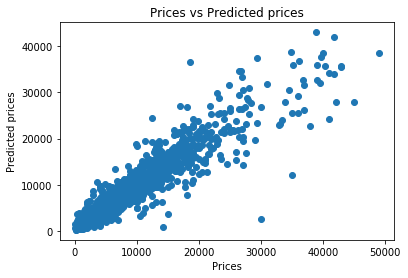

In [122]:
plt.scatter(y_test, y_pred_)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()